In [16]:
using CSV, DataFrames
using FileIO, Dates
using Plots, StatsPlots
using StatsBase

In [2]:
include("./src/cubes.jl")
include("./src/network.jl")
include("./src/motifs_discovery.jl")
include("./src/motifs_analysis.jl")

volume_tetrahedrons (generic function with 1 method)

### Read data

In [3]:
path = "./data/"
region = "california"
filepath = path * region * ".csv"

"./data/california.csv"

In [9]:
california_full = CSV.read(filepath, DataFrame);
california = california_full[california_full.Datetime .> DateTime(1988,1,1,0,0,0),:];

In [10]:
california

665442×7 DataFrame
    Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Ev ⋯
        │ DateTime                 Float64   Float64    Float64  Float64    St ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 1988-01-01T00:06:51.010    34.18    -116.414      1.3       2.42  eq ⋯
      2 │ 1988-01-01T02:34:55.130    32.968   -115.943     14.3       1.2   eq
      3 │ 1988-01-01T04:40:51.100    32.714   -115.982      5.2       2.31  eq
      4 │ 1988-01-01T04:52:58.480    34.18    -116.407      1.4       2.31  eq
      5 │ 1988-01-01T04:52:53.420    34.176   -116.415      1.6       2.21  eq ⋯
      6 │ 1988-01-01T05:21:56.680    32.955   -115.753      1.0       1.3   eq
      7 │ 1988-01-01T05:24:57.190    32.885   -115.631      5.2       1.76  eq
      8 │ 1988-01-01T05:27:54.010    32.954   -115.773      2.1       1.3   eq
   ⋮    │            ⋮                ⋮          ⋮         ⋮         ⋮         ⋱
 665436 │ 2023-02-13T02:48:58.240    34.059   -118.674      7.3       1.61  eq ⋯
 665437 │ 2023-02-13T03:22:54.140    34.05    -116.321      7.8       1.06  eq
 665438 │ 2023-02-13T04:16:52.930    35.045   -118.993     18.3       1.34  eq
 665439 │ 2023-02-13T05:26:59.550    34.864   -116.303      0.5       2.09  eq
 665440 │ 2023-02-13T07:01:55.120    33.406   -116.385      9.6       0.67  eq ⋯
 665441 │ 2023-02-13T07:40:55.270    34.16    -117.554      8.8       0.92  eq
 665442 │ 2023-02-13T08:13:52.660    35.825   -117.665     10.5       1.25  eq
                                               2 columns and 665427 rows omitted

In [23]:
describe(california, :all, cols=:Magnitude)

1×15 DataFrame
 Row │ variable   mean     std       min      q25      median   q75      max   ⋯
     │ Symbol     Float64  Float64   Float64  Float64  Float64  Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Magnitude  1.35485  0.652206     0.01      0.9      1.3     1.73      7 ⋯
                                                               8 columns omitted

In [22]:
combine(groupby(california, [:Magnitude_Type]), nrow => :count)

10×2 DataFrame
 Row │ Magnitude_Type  count  
     │ String3         Int64  
─────┼────────────────────────
   1 │ l               408479
   2 │ h                71048
   3 │ w                  585
   4 │ d                  232
   5 │ n                 7255
   6 │ c               177571
   7 │ b                   17
   8 │ s                    2
   9 │ e                    1
  10 │ lr                 252

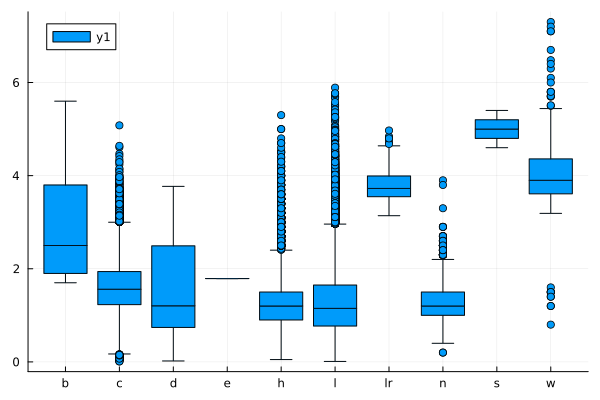

In [19]:
@df california boxplot(:Magnitude_Type, :Magnitude)

In [31]:
california[california.Magnitude .> 6,:]

9×7 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Event ⋯
     │ DateTime                 Float64   Float64    Float64  Float64    Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1992-04-23T04:50:53.230    33.96    -116.317     11.6       6.1   eq    ⋯
   2 │ 1992-06-28T11:57:54.130    34.2     -116.437     -0.1       7.3   eq
   3 │ 1992-06-28T15:05:50.730    34.203   -116.827      3.6       6.3   eq
   4 │ 1994-01-17T12:30:55.390    34.213   -118.537     18.2       6.7   eq
   5 │ 1999-10-16T09:46:54.460    34.603   -116.265     13.7       7.1   eq    ⋯
   6 │ 2003-12-22T19:15:55.900    35.719   -121.157     11.5       6.48  eq
   7 │ 2010-04-04T22:40:52.360    32.286   -115.295     10.0       7.2   eq
   8 │ 2019-07-04T17:33:59        35.705   -117.504     10.5       6.4   eq
   9 │ 2019-07-06T03:19:53.040    35.77    -117.599      8.0       7.1   eq    ⋯
                                                               2 columns omitted

In [27]:
california[(california.Depth .< 0.1) .& (california.Magnitude .> 5.0) ,:]

6×7 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Event ⋯
     │ DateTime                 Float64   Float64    Float64  Float64    Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1992-06-28T11:57:54.130    34.2     -116.437     -0.1       7.3   eq    ⋯
   2 │ 1992-06-28T12:00:55        34.131   -116.408     -1.1       5.77  eq
   3 │ 1992-11-27T16:00:57.490    34.34    -116.9       -0.4       5.29  eq
   4 │ 1996-11-27T20:17:54.110    36.075   -117.65      -0.0       5.3   eq
   5 │ 2004-09-29T17:10:54.960    35.886   -120.506     -0.5       5.04  eq    ⋯
   6 │ 2009-10-03T01:16:50.310    36.391   -117.861     -1.8       5.19  eq
                                                               2 columns omitted

In [30]:
california[(california.Depth .< -1.5)  ,:]

945×7 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Event ⋯
     │ DateTime                 Float64   Float64    Float64  Float64    Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1989-08-09T14:22:50.520    36.13    -118.114     -1.6       1.69  eq    ⋯
   2 │ 1990-11-26T05:25:50.270    36.137   -118.064     -1.6       1.4   eq
   3 │ 1990-12-24T04:04:59.190    36.055   -118.263     -1.6       1.3   eq
   4 │ 1991-06-19T13:59:58.290    36.134   -118.095     -1.7       1.2   eq
   5 │ 1991-08-18T08:47:59.300    36.026   -118.389     -1.6       1.51  eq    ⋯
   6 │ 1991-12-25T11:50:51.800    34.413   -116.866     -1.6       2.06  eq
   7 │ 1992-01-04T03:36:57.110    36.243   -118.274     -1.8       3.07  eq
   8 │ 1992-01-28T08:53:55.400    36.132   -118.12      -1.7       1.36  eq
  ⋮  │            ⋮                ⋮          ⋮         ⋮         ⋮          ⋮ ⋱
 939 │ 2020-08-05T18:03:50.090    36.402   -117.955     -1.9       0.79  eq    ⋯
 940 │ 2021-05-07T18:13:51.910    36.468   -117.51      -1.6       2.13  eq
 941 │ 2021-05-15T23:25:59.130    36.465   -117.881     -1.6       0.86  eq
 942 │ 2022-04-18T16:05:55.960    36.628   -118.076     -1.7       1.81  eq
 943 │ 2022-06-17T07:46:54.440    36.456   -117.545     -1.8       1.8   eq    ⋯
 944 │ 2022-08-02T10:07:55.290    36.475   -117.514     -1.8       1.99  eq
 945 │ 2023-01-30T03:51:59.340    34.857   -118.98      -1.8       0.54  eq
                                                  2 columns and 930 rows omitted

In [12]:
california[california.Magnitude_Type .== "w",:]

585×7 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Event ⋯
     │ DateTime                 Float64   Float64    Float64  Float64    Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1991-06-28T14:43:54.660    34.27    -117.993      8.0       5.8   eq    ⋯
   2 │ 1992-04-23T04:50:53.230    33.96    -116.317     11.6       6.1   eq
   3 │ 1992-06-28T11:57:54.130    34.2     -116.437     -0.1       7.3   eq
   4 │ 1992-06-28T15:05:50.730    34.203   -116.827      3.6       6.3   eq
   5 │ 1994-01-17T12:30:55.390    34.213   -118.537     18.2       6.7   eq    ⋯
   6 │ 1996-11-27T20:17:54.110    36.075   -117.65      -0.0       5.3   eq
   7 │ 1997-07-17T19:46:57.200    36.965   -121.597      6.6       3.9   eq
   8 │ 1997-08-06T11:04:57.300    36.979   -121.467      6.6       3.6   eq
  ⋮  │            ⋮                ⋮          ⋮         ⋮         ⋮          ⋮ ⋱
 579 │ 2022-10-12T12:54:57        35.049   -118.996     12.3       3.67  eq    ⋯
 580 │ 2022-12-01T15:28:59.660    32.836   -116.04      10.5       3.82  eq
 581 │ 2022-12-06T00:10:58.450    35.932   -120.031      6.8       4.04  eq
 582 │ 2022-12-07T14:13:52.690    35.509   -118.391      5.1       3.56  eq
 583 │ 2022-12-31T11:41:59.460    34.356   -116.922      4.7       3.47  eq    ⋯
 584 │ 2022-12-31T12:12:56.650    33.398   -116.393      3.9       4.14  eq
 585 │ 2023-01-25T10:00:54.680    33.885   -118.704     14.7       4.19  eq
                                                  2 columns and 570 rows omitted

In [11]:
california[california.Magnitude_Type .== "l",:]

408479×7 DataFrame
    Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Ev ⋯
        │ DateTime                 Float64   Float64    Float64  Float64    St ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 1988-01-02T19:40:53.060    34.176   -116.411      1.8       3.35  eq ⋯
      2 │ 1988-01-02T19:43:50.960    34.179   -116.409      1.3       3.13  eq
      3 │ 1988-01-03T15:47:55.750    33.032   -117.859      5.7       3.12  eq
      4 │ 1988-01-05T09:03:53.240    33.07    -117.86       5.7       3.92  eq
      5 │ 1988-01-08T04:11:53.270    34.124   -116.923      3.7       2.82  eq ⋯
      6 │ 1988-01-12T04:29:52.320    33.98    -116.648      5.6       2.86  eq
      7 │ 1988-01-13T00:10:50.510    34.933   -116.683      5.2       3.0   eq
      8 │ 1988-01-15T21:00:53.610    36.037   -118.054      4.4       2.72  eq
   ⋮    │            ⋮                ⋮          ⋮         ⋮         ⋮         ⋱
 408473 │ 2023-02-13T02:48:58.240    34.059   -118.674      7.3       1.61  eq ⋯
 408474 │ 2023-02-13T03:22:54.140    34.05    -116.321      7.8       1.06  eq
 408475 │ 2023-02-13T04:16:52.930    35.045   -118.993     18.3       1.34  eq
 408476 │ 2023-02-13T05:26:59.550    34.864   -116.303      0.5       2.09  eq
 408477 │ 2023-02-13T07:01:55.120    33.406   -116.385      9.6       0.67  eq ⋯
 408478 │ 2023-02-13T07:40:55.270    34.16    -117.554      8.8       0.92  eq
 408479 │ 2023-02-13T08:13:52.660    35.825   -117.665     10.5       1.25  eq
                                               2 columns and 408464 rows omitted

### Data visualization

### Cube split

In [ ]:
california, california_cubes = region_cube_split(california,side=5,energyRelease=true);

### Seismic Network Creation

In [ ]:
MG = create_network(california, california_cubes; edgeWeight=false)
connectivity = degree(MG);

#### Connectivity Distribution

## Motifs

### Motifs Discovery

#### Triangles

In [ ]:
inputName = "./networks/" * region * "_5km.txt"
queryName = "./networks/queryTriangle.txt";

In [ ]:
stats = motifs_discovery(inputName,queryName)

#### Tetrahedrons

In [ ]:
inputName = "./networks/" * region * "_5km.txt"
queryName = "./networks/queryTetrahedron.txt";

In [ ]:
stats = motifs_discovery(inputName,queryName)

### Motifs Analysis

#### Triangles

In [ ]:
motif = "Triangle"
filename= "./motifs" * motif * "_" * region * "_5km.csv"
motifs = readdlm(filename, ',', Int64);
motifs;

In [ ]:
motif_energy = total_mean_energy(motifs, california, california_cubes);
areas = area_triangles(motifs, california_cubes);

In [ ]:
area = [value for value in values(areas)];
totalenergy = [value[1] for value in values(motif_energy)]
meanenergy = [value[2] for value in values(motif_energy)];

#### Area weighted processing

In [ ]:
area_weight_totalenergy = []
area_weight_meanenergy = []
for key in keys(motif_energy)
    # Used to filter out zeros and very small areas (triangles on the vertical for example)
    if areas[key] > 1
        push!(area_weight_totalenergy, areas[key]/motif_energy[key][1])
        push!(area_weight_meanenergy, areas[key]/motif_energy[key][2])
    end
end

#### Tetrahedrons

In [ ]:
filename= "./motifs" * motif * "_" * region * "_5km.csv"
motifs = readdlm(filename, ',', Int64);
motifs;

In [ ]:
motif_energy = total_mean_energy(motifs, california, california_cubes)
volumes = volume_tetrahedrons(motifs,california_cubes);

In [ ]:
volume = [value for value in values(volumes)];
totalenergy = [value[1] for value in values(motif_energy)]
meanenergy = [value[2] for value in values(motif_energy)];

#### Volume weighted processing

In [ ]:
volume_weight_totalenergy = []
volume_weight_meanenergy = []
for key in keys(motif_energy)
    # Used to filter out zeros and very small areas (triangles on the vertical for example)
    if volumes[key] > 1
        push!(volume_weight_totalenergy, volumes[key]/motif_energy[key][1])
        push!(volume_weight_meanenergy, volumes[key]/motif_energy[key][2])
    end
end

### Distributions and Fits